In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

def calculate_metrics(true_values, pred_values):
    mse = round(mean_squared_error(true_values, pred_values),3)
    mae = round(mean_absolute_error(true_values, pred_values),3)
    r_score = round(r2_score(true_values, pred_values),3)

    return {"mse": mse,
            "mae": mae,
            "r^2": r_score,}

In [14]:
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 21.0.1+12-LTS-29, mixed mode, sharing)
  Starting server from C:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\38066\AppData\Local\Temp\tmpzxfanrwx
  JVM stdout: C:\Users\38066\AppData\Local\Temp\tmpzxfanrwx\h2o_38066_started_from_python.out
  JVM stderr: C:\Users\38066\AppData\Local\Temp\tmpzxfanrwx\h2o_38066_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Kiev
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,2 months and 17 days
H2O_cluster_name:,H2O_from_python_38066_kctvxw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.950 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


In [15]:
import os
import sys
sys.path.insert(0, os.path.dirname('C:\work\DrugDiscovery\main_git\XAI_Chem\ml_part'))

import pandas as pd

from ml_part.random_forest.data_prep.preparation import DataPreparation
from ml_part.random_forest.train import RFTrain

CSV_PATH = r'C:\work\DrugDiscovery\git_for_public\fluoricLogPpKa\data\logP_updated_data_08.03_transormed.csv'
smiles_filepath = r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\updated_features\smiles_to_index.pkl'

dataPreparation = DataPreparation(CSV_PATH)

unimportant_features_to_drop = ['dipole_moment']
X, y = dataPreparation.prepare_data_for_RF(is_pKa=False,
                                           use_mandatory_features=True,
                                           is_remove_outliers=True,
                                           is_remove_nan=False,
                                           outliers_features_to_skip=unimportant_features_to_drop)

LOGP_FEATURES = ['f_freedom', 'PPSA5', 'mol_num_cycles', 'nFRing', 'nF', 'identificator', 'f_atom_fraction',
                 'mol_weight', 'dipole_moment', 'nHRing', 'nO', 'PBF', 'nC', 'nARing',
                 'cis/trans', 'PNSA5', 'FPSA3', 'mol_volume', 'RPCS', 'GeomShapeIndex',
                 'WPSA5', 'TASA', 'f_to_fg', 'avg_atoms_in_cycle', 'nFHRing',
                 'chirality']

features_to_drop = []
for feature_name in X.columns:
    if feature_name not in LOGP_FEATURES:
        features_to_drop.append(feature_name)


X = X.drop(features_to_drop, axis=1)

rf_train = RFTrain(X=X, 
                   y=y,
                   smiles_filepath=smiles_filepath,
                   is_pKa=False,
                   k_folds=2)

y_train = rf_train.y_train
X_train = rf_train.X_train

y_test = rf_train.y_test
X_test = rf_train.X_test

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

print(len(train_df), len(test_df))

train = h2o.H2OFrame(train_df)
test = h2o.H2OFrame(test_df)

True
183
['naRing', 'identificator', 'angle_R2X2R1', 'nO', 'WPSA5', 'avg_atoms_in_cycle', 'nHRing', 'distance_between_atoms_in_f_group_centers', 'RPCS', 'f_freedom', 'TASA', 'nFAHRing', 'f_to_fg', 'nARing', 'FPSA3', 'nF', 'PBF', 'GeomShapeIndex', 'angle_R1X1R2', 'PNSA5', 'cis/trans', 'tpsa+f', 'nC', 'angle_X1X2R2', 'PPSA5', 'angle_X2X1R1', 'distance_between_atoms_in_cycle_and_f_group', 'mol_volume', 'nAHRing', 'nFARing', 'nFRing', 'dihedral_angle', 'dipole_moment', 'chirality', 'nFHRing', 'mol_num_cycles', 'pKa', 'logP']
distance_between_atoms_in_f_group_centers outliers indexes: [ 35 167]
mol_volume outliers indexes: [127]
logP outliers indexes: [82, 83]
Remains rows:172, amount of features: 38
147 25
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [16]:
test_df.keys()

Index(['identificator', 'nO', 'WPSA5', 'avg_atoms_in_cycle', 'nHRing', 'RPCS',
       'f_freedom', 'TASA', 'f_to_fg', 'nARing', 'FPSA3', 'nF', 'PBF',
       'GeomShapeIndex', 'PNSA5', 'cis/trans', 'nC', 'PPSA5', 'mol_volume',
       'nFRing', 'dipole_moment', 'chirality', 'nFHRing', 'mol_num_cycles',
       'logP'],
      dtype='object')

In [17]:
import numpy as np
import pandas as pd
import scipy.stats as ss

def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


ring_features = [feature_name for feature_name in X.columns if 'ring' in feature_name.lower()]
ring_features_to_remain = ['nFRing', 'nHRing', 'nARing', 'nFHRing']

for i in range(len(ring_features)):
    for j in range(len(ring_features)):
        first_feature = X[ring_features[i]]
        second_feature = X[ring_features[j]]

        if i == j:
            continue

        confusion_matrix = pd.crosstab(first_feature, second_feature)
        cramers_v_value = cramers_v(confusion_matrix.values)
        print(f"{ring_features[i]}, {ring_features[j]}, corr: {cramers_v_value}")

nHRing, nARing, corr: 0.6568999956701997
nHRing, nFRing, corr: 0.5799472743597861
nHRing, nFHRing, corr: 0.7298992678284247
nARing, nHRing, corr: 0.6568999956701996
nARing, nFRing, corr: 0.8557878388867258
nARing, nFHRing, corr: 0.7758976171502688
nFRing, nHRing, corr: 0.5799472743597861
nFRing, nARing, corr: 0.8557878388867258
nFRing, nFHRing, corr: 0.8090152479786314
nFHRing, nHRing, corr: 0.7298992678284247
nFHRing, nARing, corr: 0.775897617150269
nFHRing, nFRing, corr: 0.8090152479786314


In [18]:
x = train.columns
y = "logP"
x.remove(y)

aml = H2OAutoML(seed=1, max_runtime_secs_per_model=300)
aml.train(x=x, y=y, training_frame=train, fold_column="fold_id")

lb = aml.leaderboard
print(lb.head(rows=lb.nrows))

AutoML progress: |


22:33:55.549: Fold column fold_id will be used for cross-validation. nfolds parameter will be ignored.
22:33:55.564: AutoML: XGBoost is not available; skipping it.


22:33:56.156: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 147.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                     rmse        mse       mae      rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_5_AutoML_1_20240308_223355  0.235301  0.0553664  0.179425  0.0831121                 0.0553664
StackedEnsemble_BestOfFamily_3_AutoML_1_20240308_223355  0.236199  0.0557901  0.179995  0.0834161                 0.0557901
StackedEnsemble_BestOfFamily_6_AutoML_1_20240308_223355  0.238603  0.0569312  0.183078  0.0843101                 0.0569312
DeepLearning_grid_1_AutoML_1_20240308_223355_model_105   0.243399  0.0592432  0.18601   0.0865794         

TRAIN

In [19]:
best_model = aml.get_best_model()
preds = best_model.predict(train)
true = train.as_data_frame()['logP']
predicted_values = preds.as_data_frame()['predict']

calculate_metrics(true, predicted_values)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'mse': 0.009, 'mae': 0.068, 'r^2': 0.973}

OOS

In [20]:
best_model = aml.get_best_model()
preds = best_model.predict(test)
true = test.as_data_frame()['logP']
predicted_values = preds.as_data_frame()['predict']

calculate_metrics(true, predicted_values)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'mse': 0.026, 'mae': 0.141, 'r^2': 0.901}

BEST_MODEL(for cross-val metrics)

In [21]:
best_model

key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/5
# GBM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
# GLM base models (used / total),1/1
# DRF base models (used / total),2/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,AUTO
Metalearner nfolds,0
Metalearner fold_column,fold_id


PERMUTATION IMPORTANCE

c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
C:\Users\38066\AppData\Local\Temp\ipykernel_1040\1575081460.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.barh(sum_rows.keys()[sorted_idx][::-1][:][::-1], sum_rows[sorted_idx][::-1][:][::-1])


Text(0.5, 0, 'H2O Feature Importance')

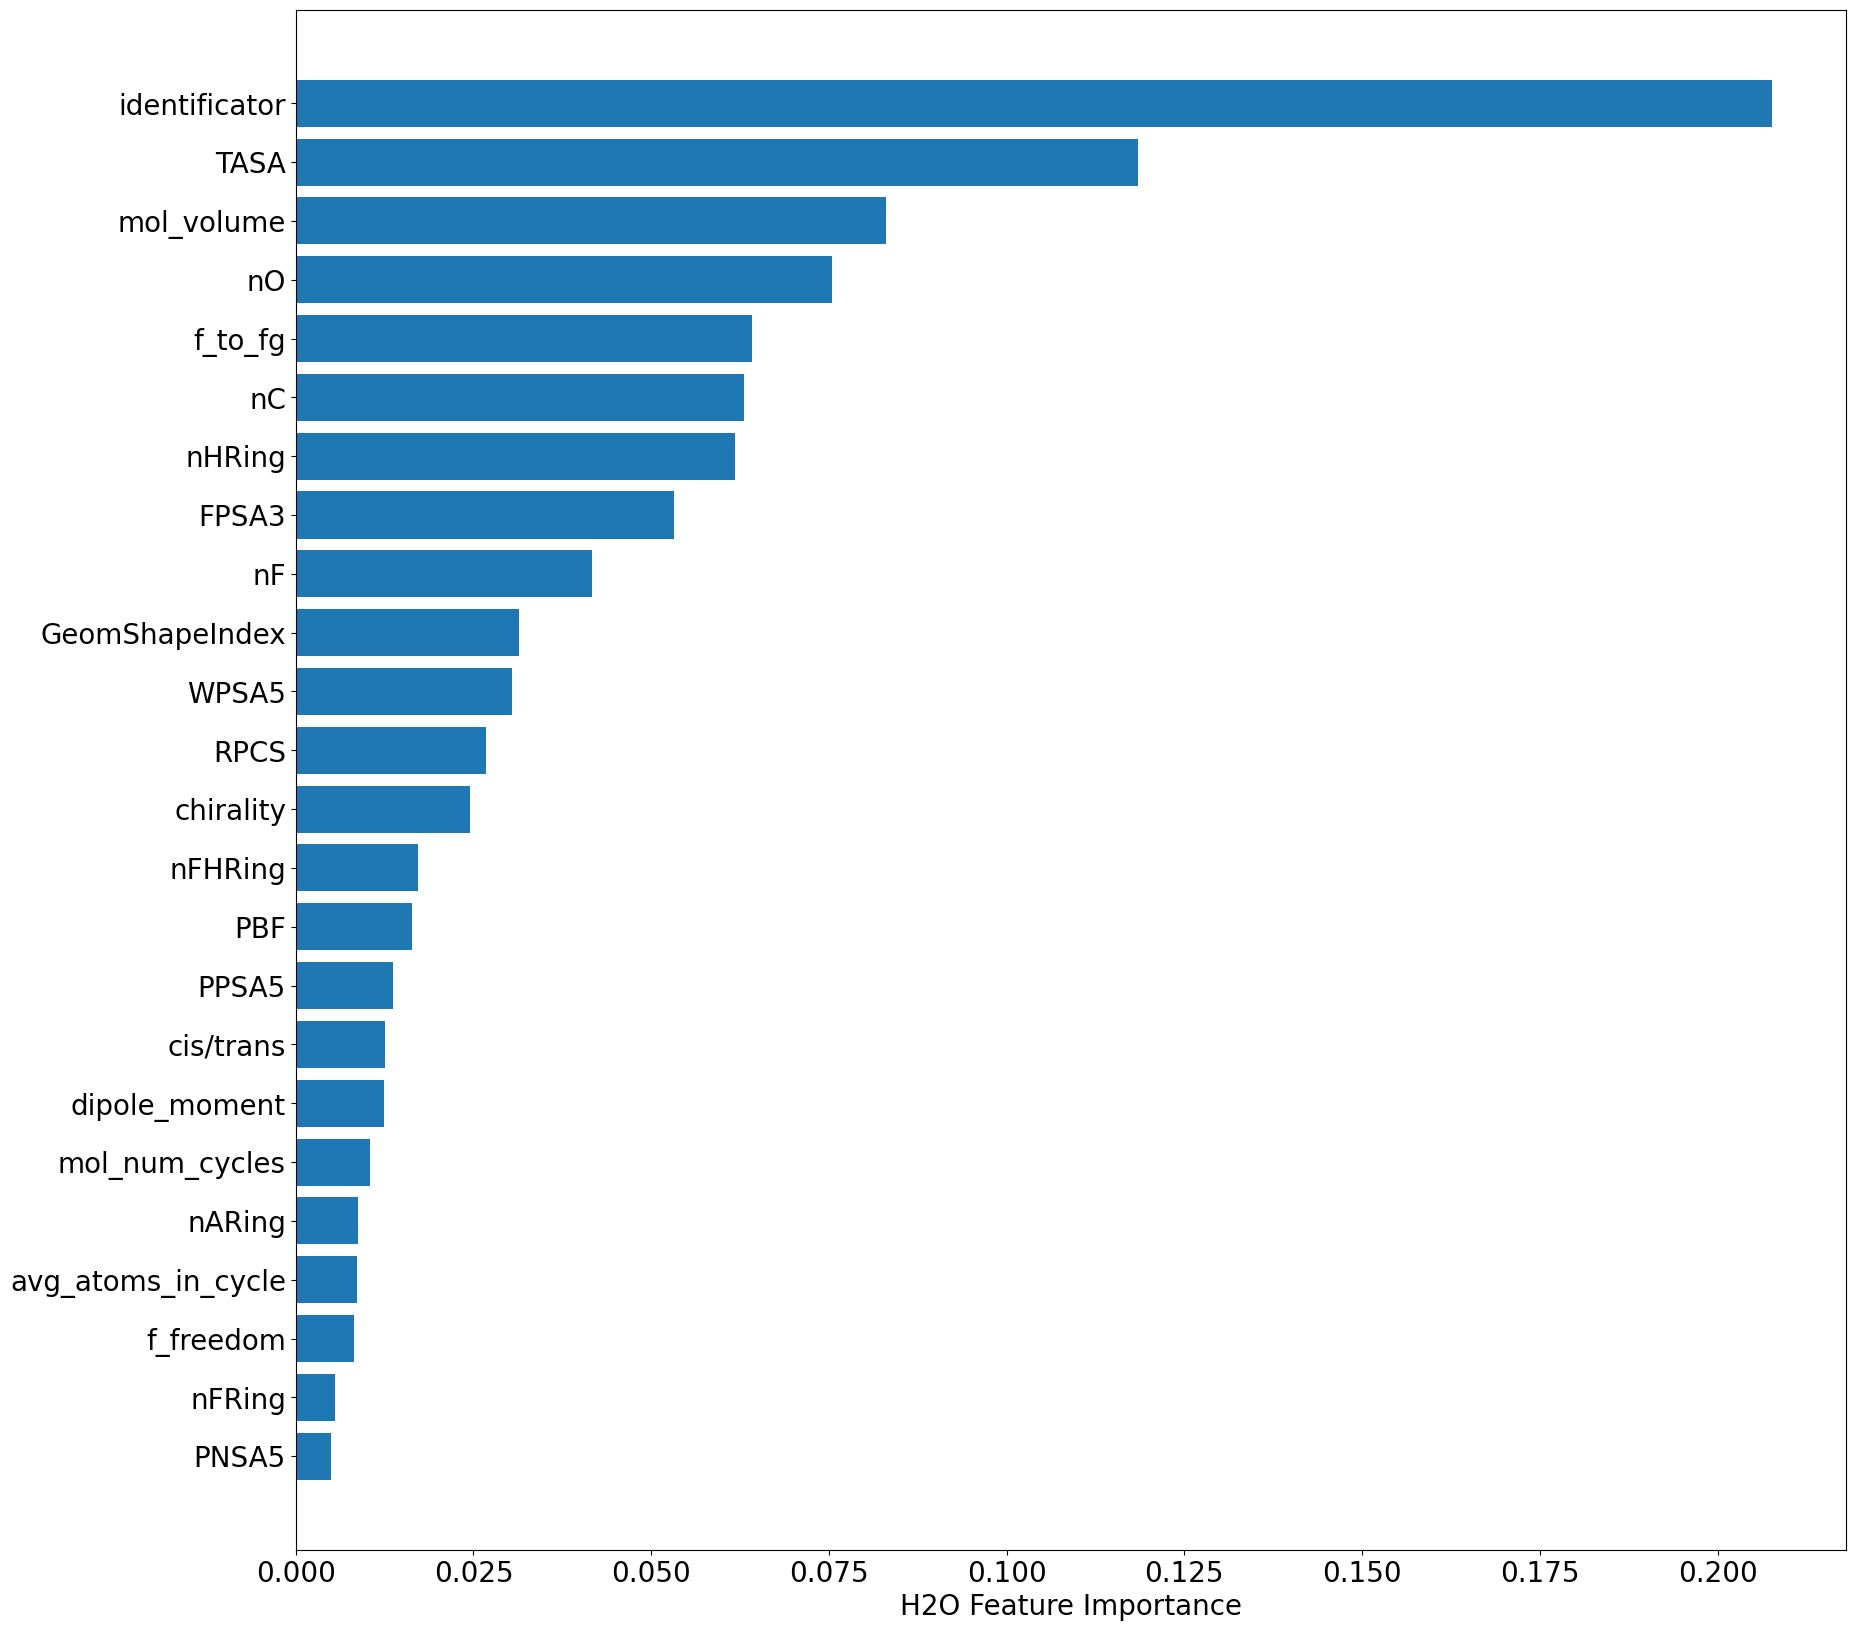

In [22]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

permutation_varimp = best_model.permutation_importance(test, use_pandas=True, n_repeats=1000)

sum_rows = permutation_varimp.sum(axis=1)
sum_rows = sum_rows / sum(sum_rows)

sorted_idx = sum_rows.argsort()
plt.figure(figsize=(20,20))
plt.barh(sum_rows.keys()[sorted_idx][::-1][:][::-1], sum_rows[sorted_idx][::-1][:][::-1])
plt.xlabel("H2O Feature Importance")

SHAP

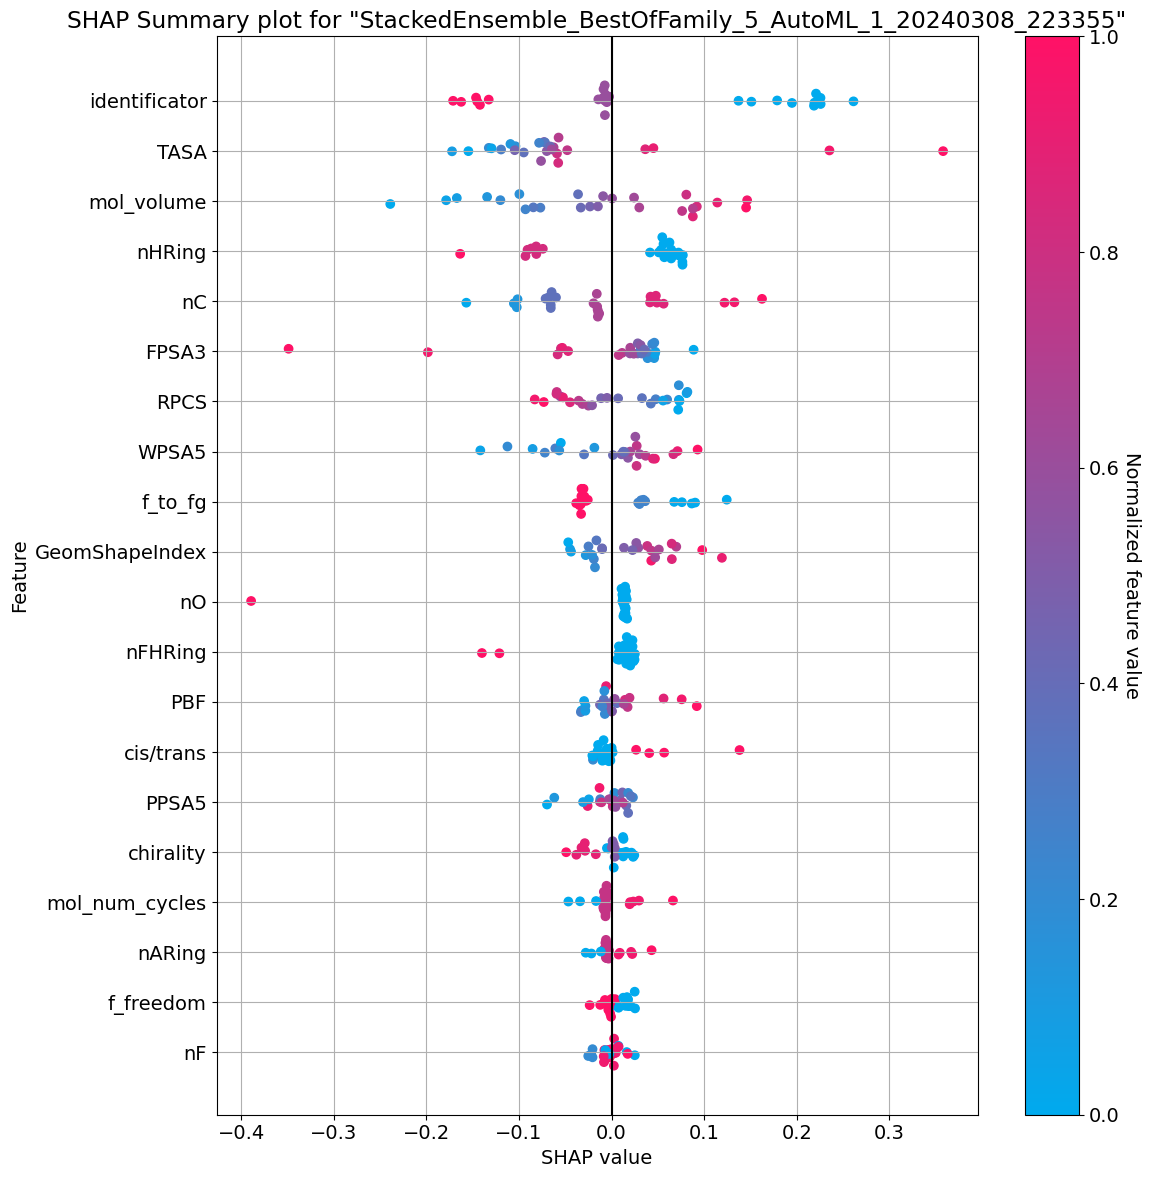

In [23]:
plt.rcParams.update({"font.size": 14})
shap_plot = best_model.shap_summary_plot(test, background_frame=train, samples=1000)

VAR IMPORTANCE

In [24]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

importance = best_model.varimp(test)

if importance is not None:
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.barh(importance['variable'][:][::-1], importance['percentage'][:][::-1])
    ax.set_xlabel('Percent')


In [25]:
import os

MODEL_SAVE_PATH = r'C:\work\DrugDiscovery\main_git\XAI_Chem\ml_part\h2o_model\models\08.02.24_feature_2.2\logP_fixed_MW'

best_model = aml.get_best_model()

model_path = h2o.save_model(model=best_model, path=os.path.join(MODEL_SAVE_PATH, 'all_molecules(without_angle_feature)_without_outliers'), force=True)
model_path

'C:\\work\\DrugDiscovery\\main_git\\XAI_Chem\\ml_part\\h2o_model\\models\\08.02.24_feature_2.2\\logP_fixed_MW\\all_molecules(without_angle_feature)_without_outliers\\StackedEnsemble_BestOfFamily_5_AutoML_1_20240308_223355'

---------------

------------

--------------

------------

----

Molecules only with dihedral angle, with angles as features

In [28]:
import os
import sys
sys.path.insert(0, os.path.dirname('C:\work\DrugDiscovery\main_git\XAI_Chem\ml_part'))

import pandas as pd

from ml_part.random_forest.data_prep.preparation import DataPreparation
from ml_part.random_forest.train import RFTrain

CSV_PATH = r'C:\work\DrugDiscovery\git_for_public\fluoricLogPpKa\data\logP_updated_data_08.03_transormed.csv'
smiles_filepath = r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\updated_features\smiles_to_index.pkl'

dataPreparation = DataPreparation(CSV_PATH)

outliers_features_to_skip = ['dipole_moment']
X, y = dataPreparation.prepare_data_for_RF(is_pKa=False,
                                           use_mandatory_features=True,
                                           is_remove_outliers=True,
                                           is_remove_nan=True,
                                           outliers_features_to_skip=outliers_features_to_skip)

correlated_features = ['f_atom_fraction', 'naHRing', 'nFaRing', 'nFaHRing', 'tpsa+f']
ring_features_to_remain = ['nFRing', 'nHRing', 'nARing', 'nFHRing']
features_to_drop = []
for feature_name in X.columns:
    if feature_name in correlated_features:
        features_to_drop.append(feature_name)
    elif "ring" in feature_name.lower() and feature_name not in ring_features_to_remain:
        features_to_drop.append(feature_name)
    elif len(X[feature_name].unique()) == 1:
        print(f"feature without unique values: {feature_name}")
        features_to_drop.append(feature_name)

X = X.drop(features_to_drop, axis=1)

rf_train = RFTrain(X=X, 
                   y=y,
                   smiles_filepath=smiles_filepath,
                   is_pKa=False,
                   k_folds=2)

y_train = rf_train.y_train
X_train = rf_train.X_train

y_test = rf_train.y_test
X_test = rf_train.X_test

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

print(len(train_df), len(test_df))

train = h2o.H2OFrame(train_df)
test = h2o.H2OFrame(test_df)

True
183
['naRing', 'identificator', 'angle_R2X2R1', 'nO', 'WPSA5', 'avg_atoms_in_cycle', 'nHRing', 'distance_between_atoms_in_f_group_centers', 'RPCS', 'f_freedom', 'TASA', 'nFAHRing', 'f_to_fg', 'nARing', 'FPSA3', 'nF', 'PBF', 'GeomShapeIndex', 'angle_R1X1R2', 'PNSA5', 'cis/trans', 'tpsa+f', 'nC', 'angle_X1X2R2', 'PPSA5', 'angle_X2X1R1', 'distance_between_atoms_in_cycle_and_f_group', 'mol_volume', 'nAHRing', 'nFARing', 'nFRing', 'dihedral_angle', 'dipole_moment', 'chirality', 'nFHRing', 'mol_num_cycles', 'pKa', 'logP']
distance_between_atoms_in_f_group_centers outliers indexes: [ 35 167]
mol_volume outliers indexes: [127]
logP outliers indexes: [82, 83]
Remains rows:106, amount of features: 38
90 16
Parse progress: |

████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [29]:
train_df.columns

Index(['identificator', 'angle_R2X2R1', 'nO', 'WPSA5', 'avg_atoms_in_cycle',
       'nHRing', 'distance_between_atoms_in_f_group_centers', 'RPCS',
       'f_freedom', 'TASA', 'f_to_fg', 'nARing', 'FPSA3', 'nF', 'PBF',
       'GeomShapeIndex', 'angle_R1X1R2', 'PNSA5', 'cis/trans', 'nC',
       'angle_X1X2R2', 'PPSA5', 'angle_X2X1R1',
       'distance_between_atoms_in_cycle_and_f_group', 'mol_volume', 'nFRing',
       'dihedral_angle', 'dipole_moment', 'chirality', 'nFHRing',
       'mol_num_cycles', 'fold_id', 'logP'],
      dtype='object')

In [30]:
x = train.columns
y = "logP"
x.remove(y)

aml = H2OAutoML(seed=1, max_runtime_secs_per_model=300)
aml.train(x=x, y=y, training_frame=train, fold_column="fold_id")

lb = aml.leaderboard
print(lb.head(rows=lb.nrows))

AutoML progress: |
00:02:42.271: Fold column fold_id will be used for cross-validation. nfolds parameter will be ignored.
00:02:42.272: AutoML: XGBoost is not available; skipping it.
00:02:42.397: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 90.0.



███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                    rmse        mse       mae      rmsle    mean_residual_deviance
DeepLearning_grid_1_AutoML_2_20240309_00242_model_107   0.253237  0.0641288  0.186003  0.0930911                 0.0641288
DeepLearning_grid_1_AutoML_2_20240309_00242_model_95    0.255969  0.0655203  0.189195  0.0938827                 0.0655203
DeepLearning_grid_2_AutoML_2_20240309_00242_model_74    0.257857  0.0664902  0.181564  0.0914078                 0.0664902
GLM_1_AutoML_2_20240309_00242                           0.261003  0.0681226  0.193549  0.0939675                 0.0681226
DeepLearning_grid_1_AutoML_2_20240309_00242_model_105   0.263159  0.0692529  0.190693  0.0987816                 0.0692529
DeepLearning_grid_3_AutoML_2_20240309_00242_model_46    0.265506  0.0704935  0.199618  0.0959262                 0.0704935
DeepLearning_grid_2_AutoML_2_20240309_00242_model_59    0.2663

TRAIN

In [31]:
best_model = aml.get_best_model()
preds = best_model.predict(train)
true = train.as_data_frame()['logP']
predicted_values = preds.as_data_frame()['predict']

calculate_metrics(true, predicted_values)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'mse': 0.011, 'mae': 0.073, 'r^2': 0.966}

OOS

In [32]:
best_model = aml.get_best_model()
preds = best_model.predict(test)
true = test.as_data_frame()['logP']
predicted_values = preds.as_data_frame()['predict']

calculate_metrics(true, predicted_values)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'mse': 0.044, 'mae': 0.163, 'r^2': 0.801}

BEST_MODEL(for cross-val metrics)

In [33]:
best_model

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_2_20240309_00242_model_107


Status of Neuron Layers: predicting logP, regression, gaussian distribution, Quadratic loss, 661 weights/biases, 14,7 KB, 900 900 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate             rate_rms               momentum    mean_weight            weight_rms           mean_bias            bias_rms
--  -------  -------  ----------------  ---------  ----  ----  --------------------  ---------------------  ----------  ---------------------  -------------------  -------------------  -----------------------
    1        31       Input             15.0
    2        20       RectifierDropout  40.0       0.0   0.0   0.018223524526242287  0.009662840515375137   0.0         0.0086814422656179     0.34172892570495605  -0.6399150188330596  0.836143970489502
    3        1        Linear                       0.0   0.0   0.001176688531995751  0.0003748119343072176  0.0         -0.013761822506785393  0.132074236869812    0.0649777310176644   1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.010597824648887208
RMSE: 0.10294573642889349
MAE: 0.07258982233803614
RMSLE: 0.03970861771687716
Mean Residual Deviance: 0.010597824648887208

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 0.06412877285504334
RMSE: 0.2532365946206104
MAE: 0.18600291960382367
RMSLE: 0.09309108521249666
Mean Residual Deviance: 0.06412877285504334

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid
----------------------  ---------  ----------  ------------  ------------
mae                     0.186118   0.00365376  0.183534      0.188701
mean_residual_deviance  0.0640596  0.00220172  0.0656164     0.0625027
mse                     0.0640596  0.00220172  0.0656164     0.0625027
r2                      0.793305   0.00183214  0.7946        0.792009
residual_deviance       0.0640596  0.00220172  0.0656164     0.0625027
rmse                    0.253081   0.00434982  0.256157      0.250005
rmsle                   0.0927479  0.00688013  0.0976129     0.0878829

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2024-03-09 00:57:56  0.000 sec                           0         0             0          nan              nan                  nan             nan
    2024-03-09 00:57:56  1 min 57.333 sec  225000 obs/sec    10        1             900        0.24958          0.06229              0.187057        0.799421
    2024-03-09 00:57:57  1 min 58.667 sec  673822 obs/sec    10010     1001          900900     0.102946         0.0105978            0.0725898       0.965874

Variable Importances: 
variable                                     relative_importance    scaled_importance    percentage
-------------------------------------------  ---------------------  -------------------  --------------------
identificator                                1.0                    1.0                  0.054154706782006456
GeomShapeIndex                               0.9265749454498291     0.9265749454498291   0.05017839448238912
nO                                           0.9053767323493958     0.9053767323493958   0.049030411467632665
RPCS                                         0.8959195017814636     0.8959195017814636   0.04851825791925647
WPSA5                                        0.868340015411377      0.868340015411377    0.047024698921686085
nHRing                                       0.804922878742218      0.804922878742218    0.043590362480413355
PNSA5    

PERMUTATION IMPORTANCE

c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


C:\Users\38066\AppData\Local\Temp\ipykernel_1040\1575081460.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.barh(sum_rows.keys()[sorted_idx][::-1][:][::-1], sum_rows[sorted_idx][::-1][:][::-1])


Text(0.5, 0, 'H2O Feature Importance')

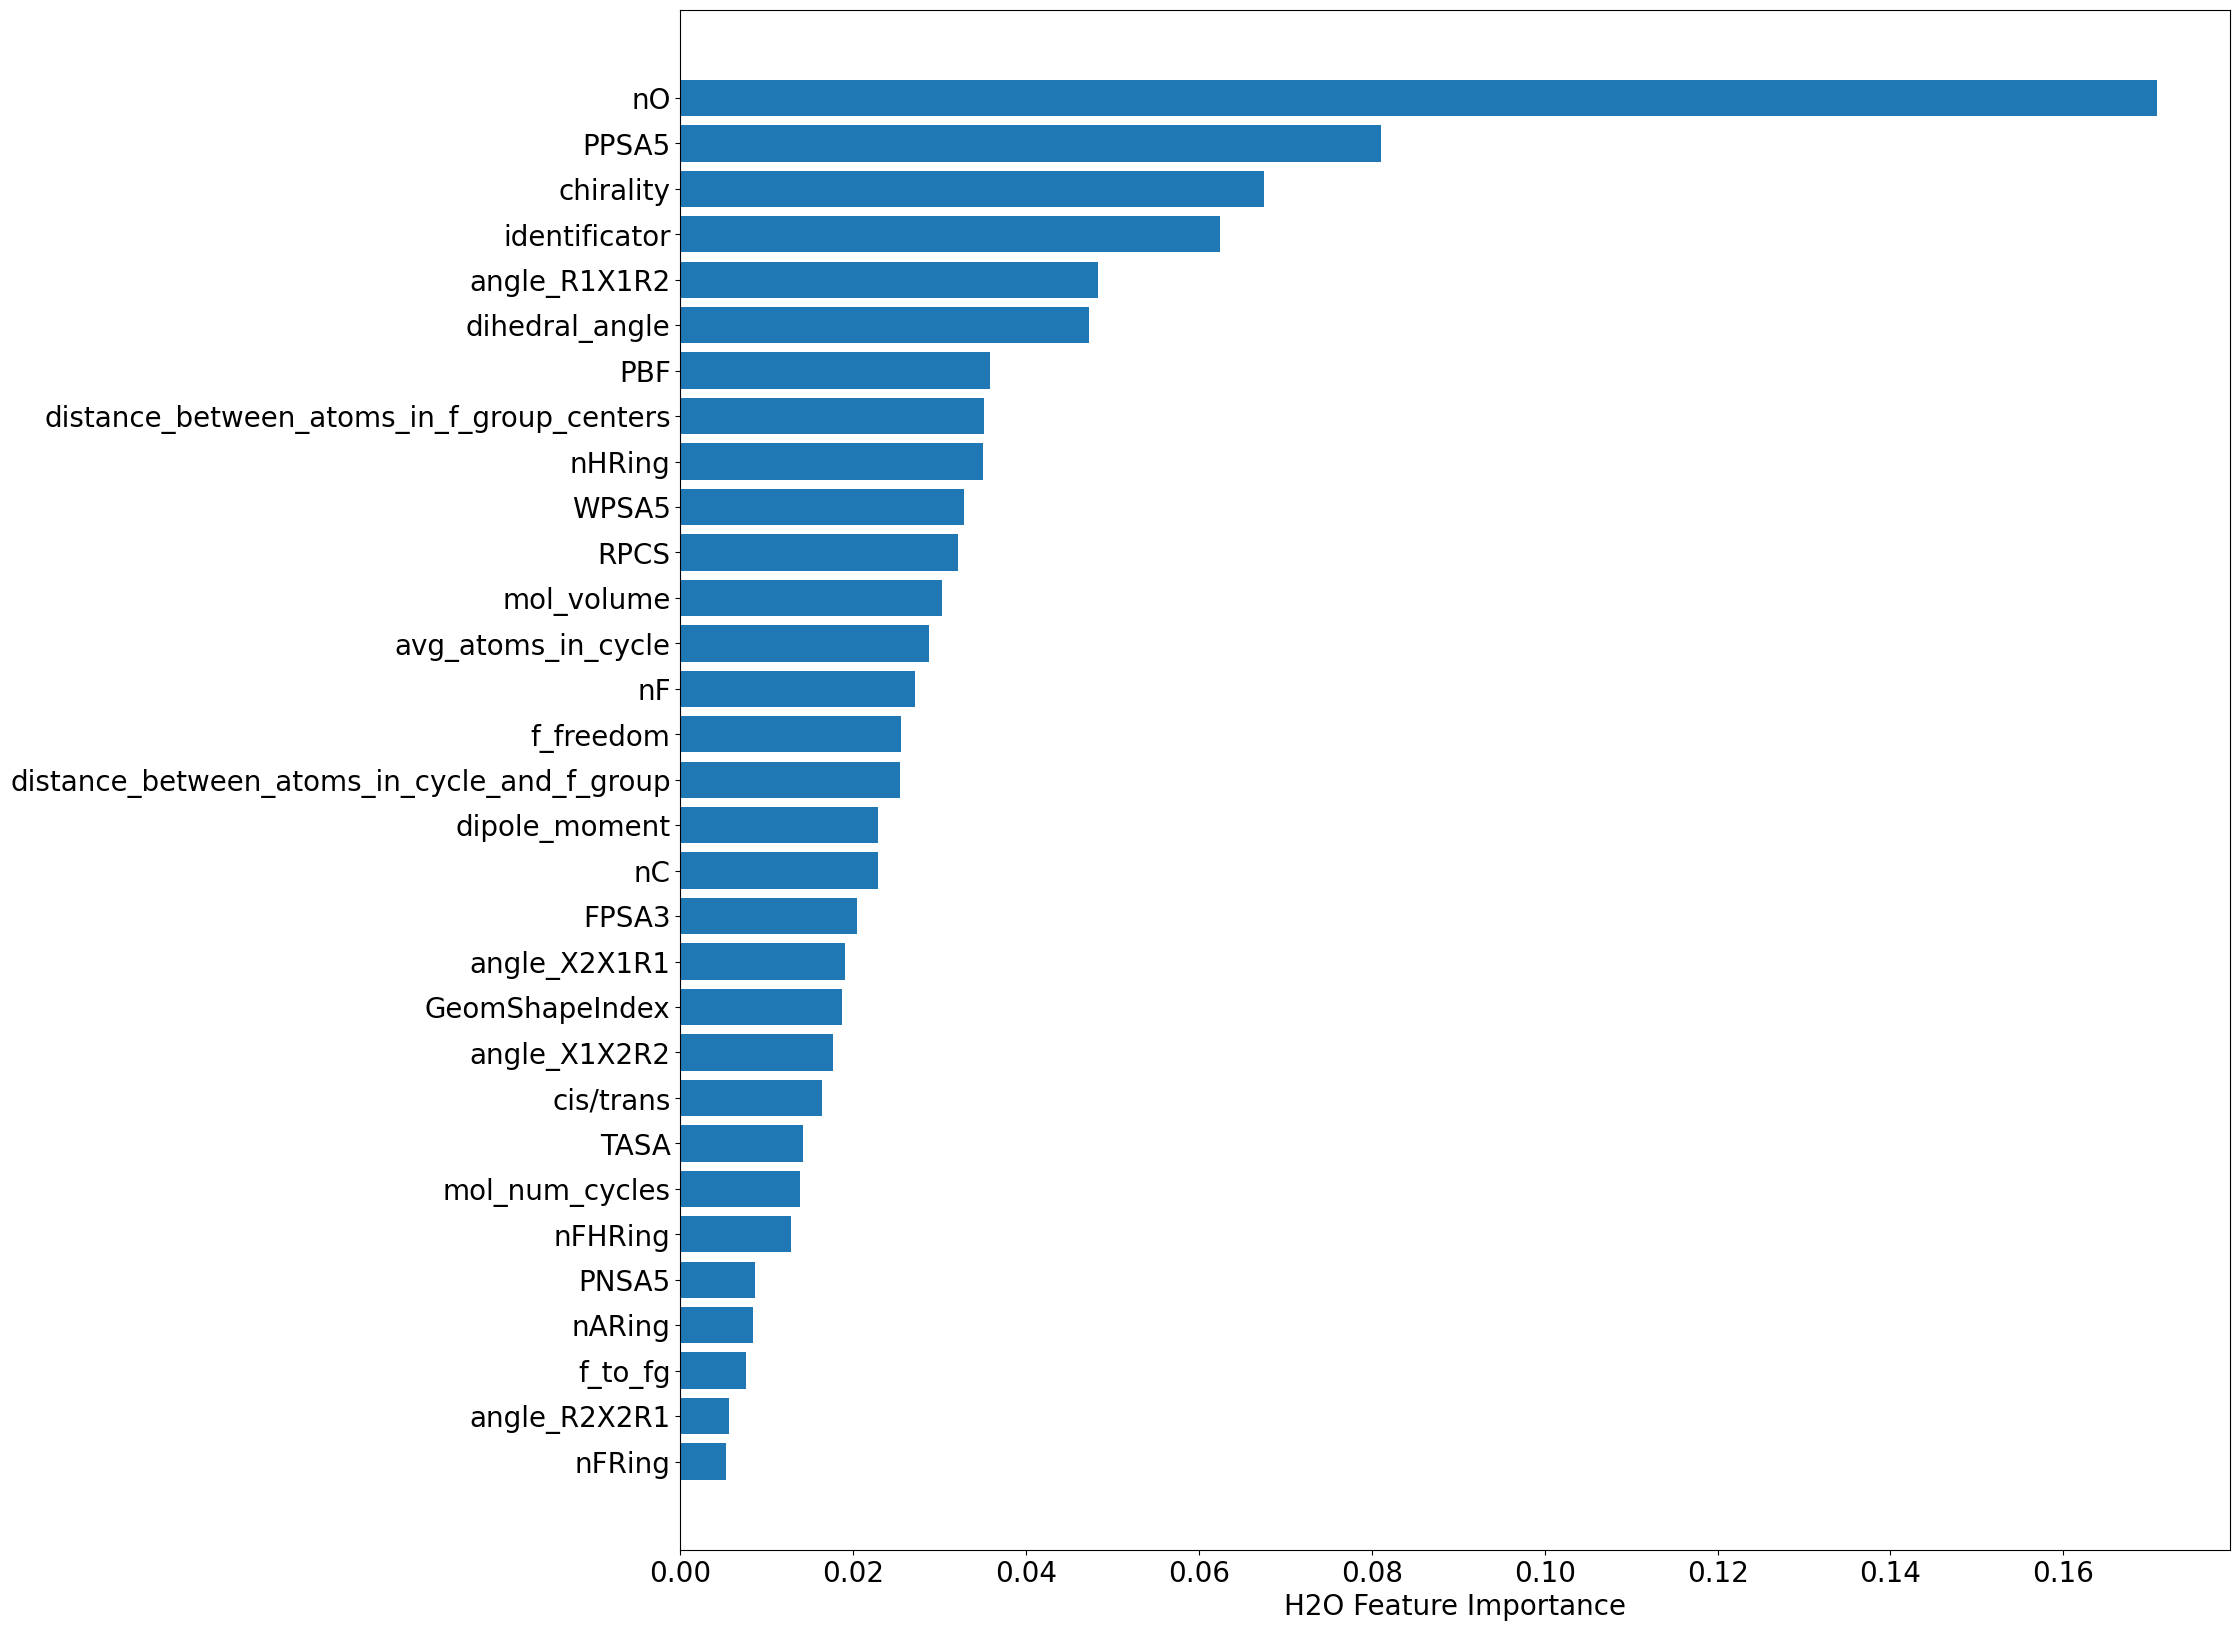

In [34]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

permutation_varimp = best_model.permutation_importance(test, use_pandas=True, n_repeats=1000)

sum_rows = permutation_varimp.sum(axis=1)
sum_rows = sum_rows / sum(sum_rows)

sorted_idx = sum_rows.argsort()
plt.figure(figsize=(20,20))
plt.barh(sum_rows.keys()[sorted_idx][::-1][:][::-1], sum_rows[sorted_idx][::-1][:][::-1])
plt.xlabel("H2O Feature Importance")

SHAP

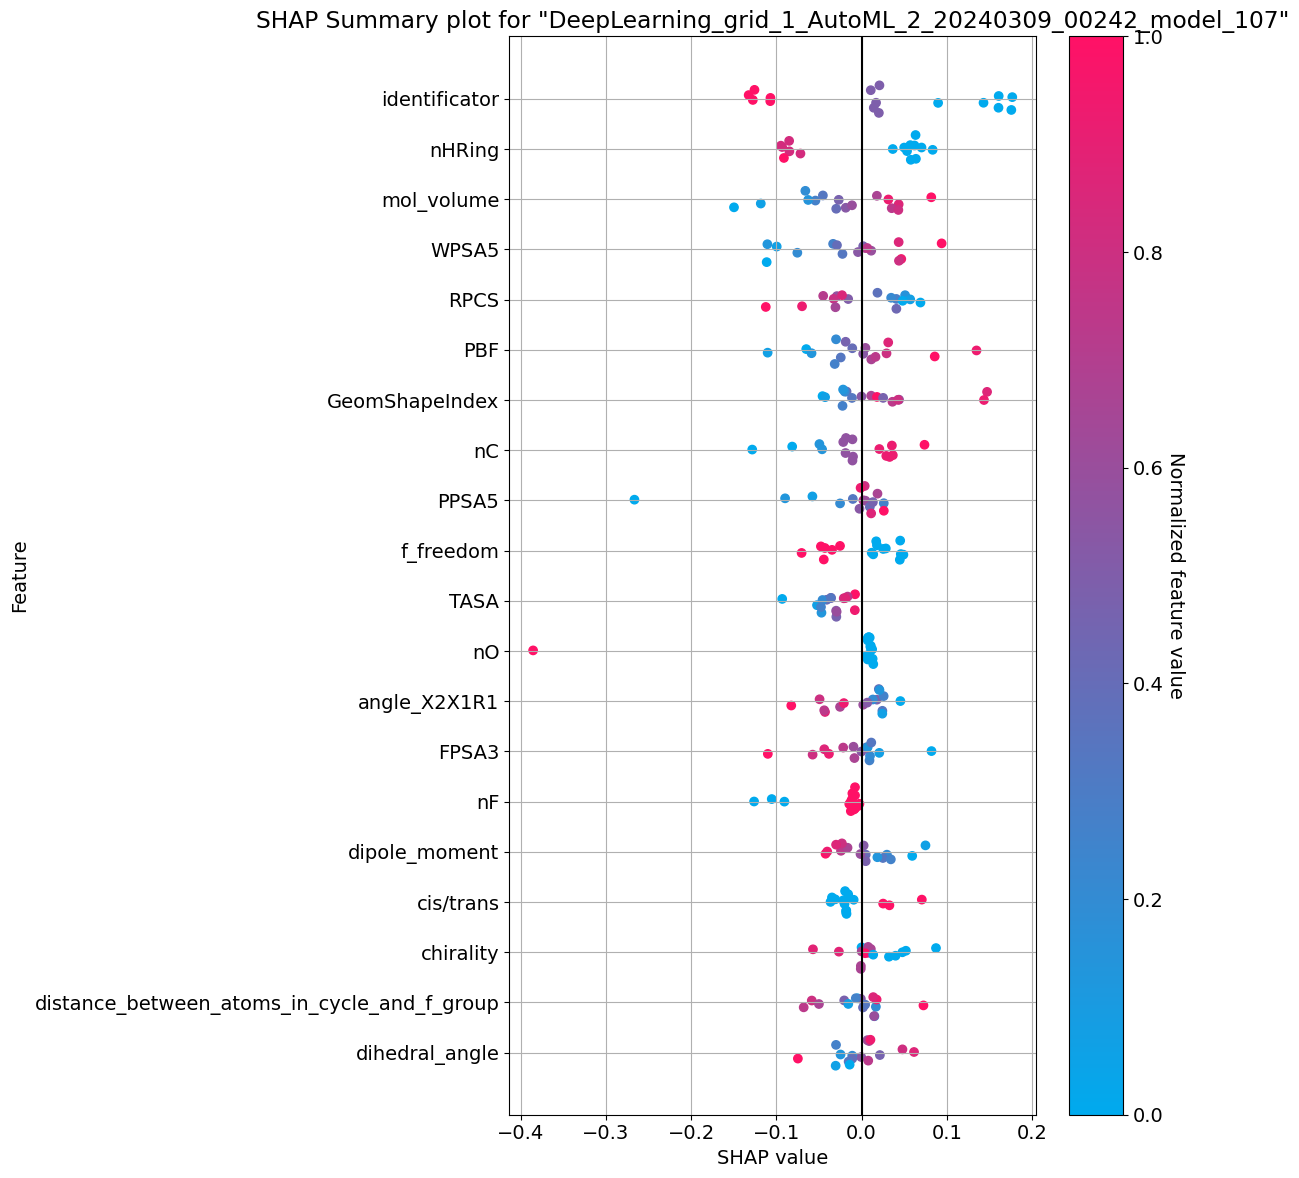

In [35]:
plt.rcParams.update({"font.size": 14})
shap_plot = best_model.shap_summary_plot(test, background_frame=train, samples=1000)

VAR IMPORTANCE

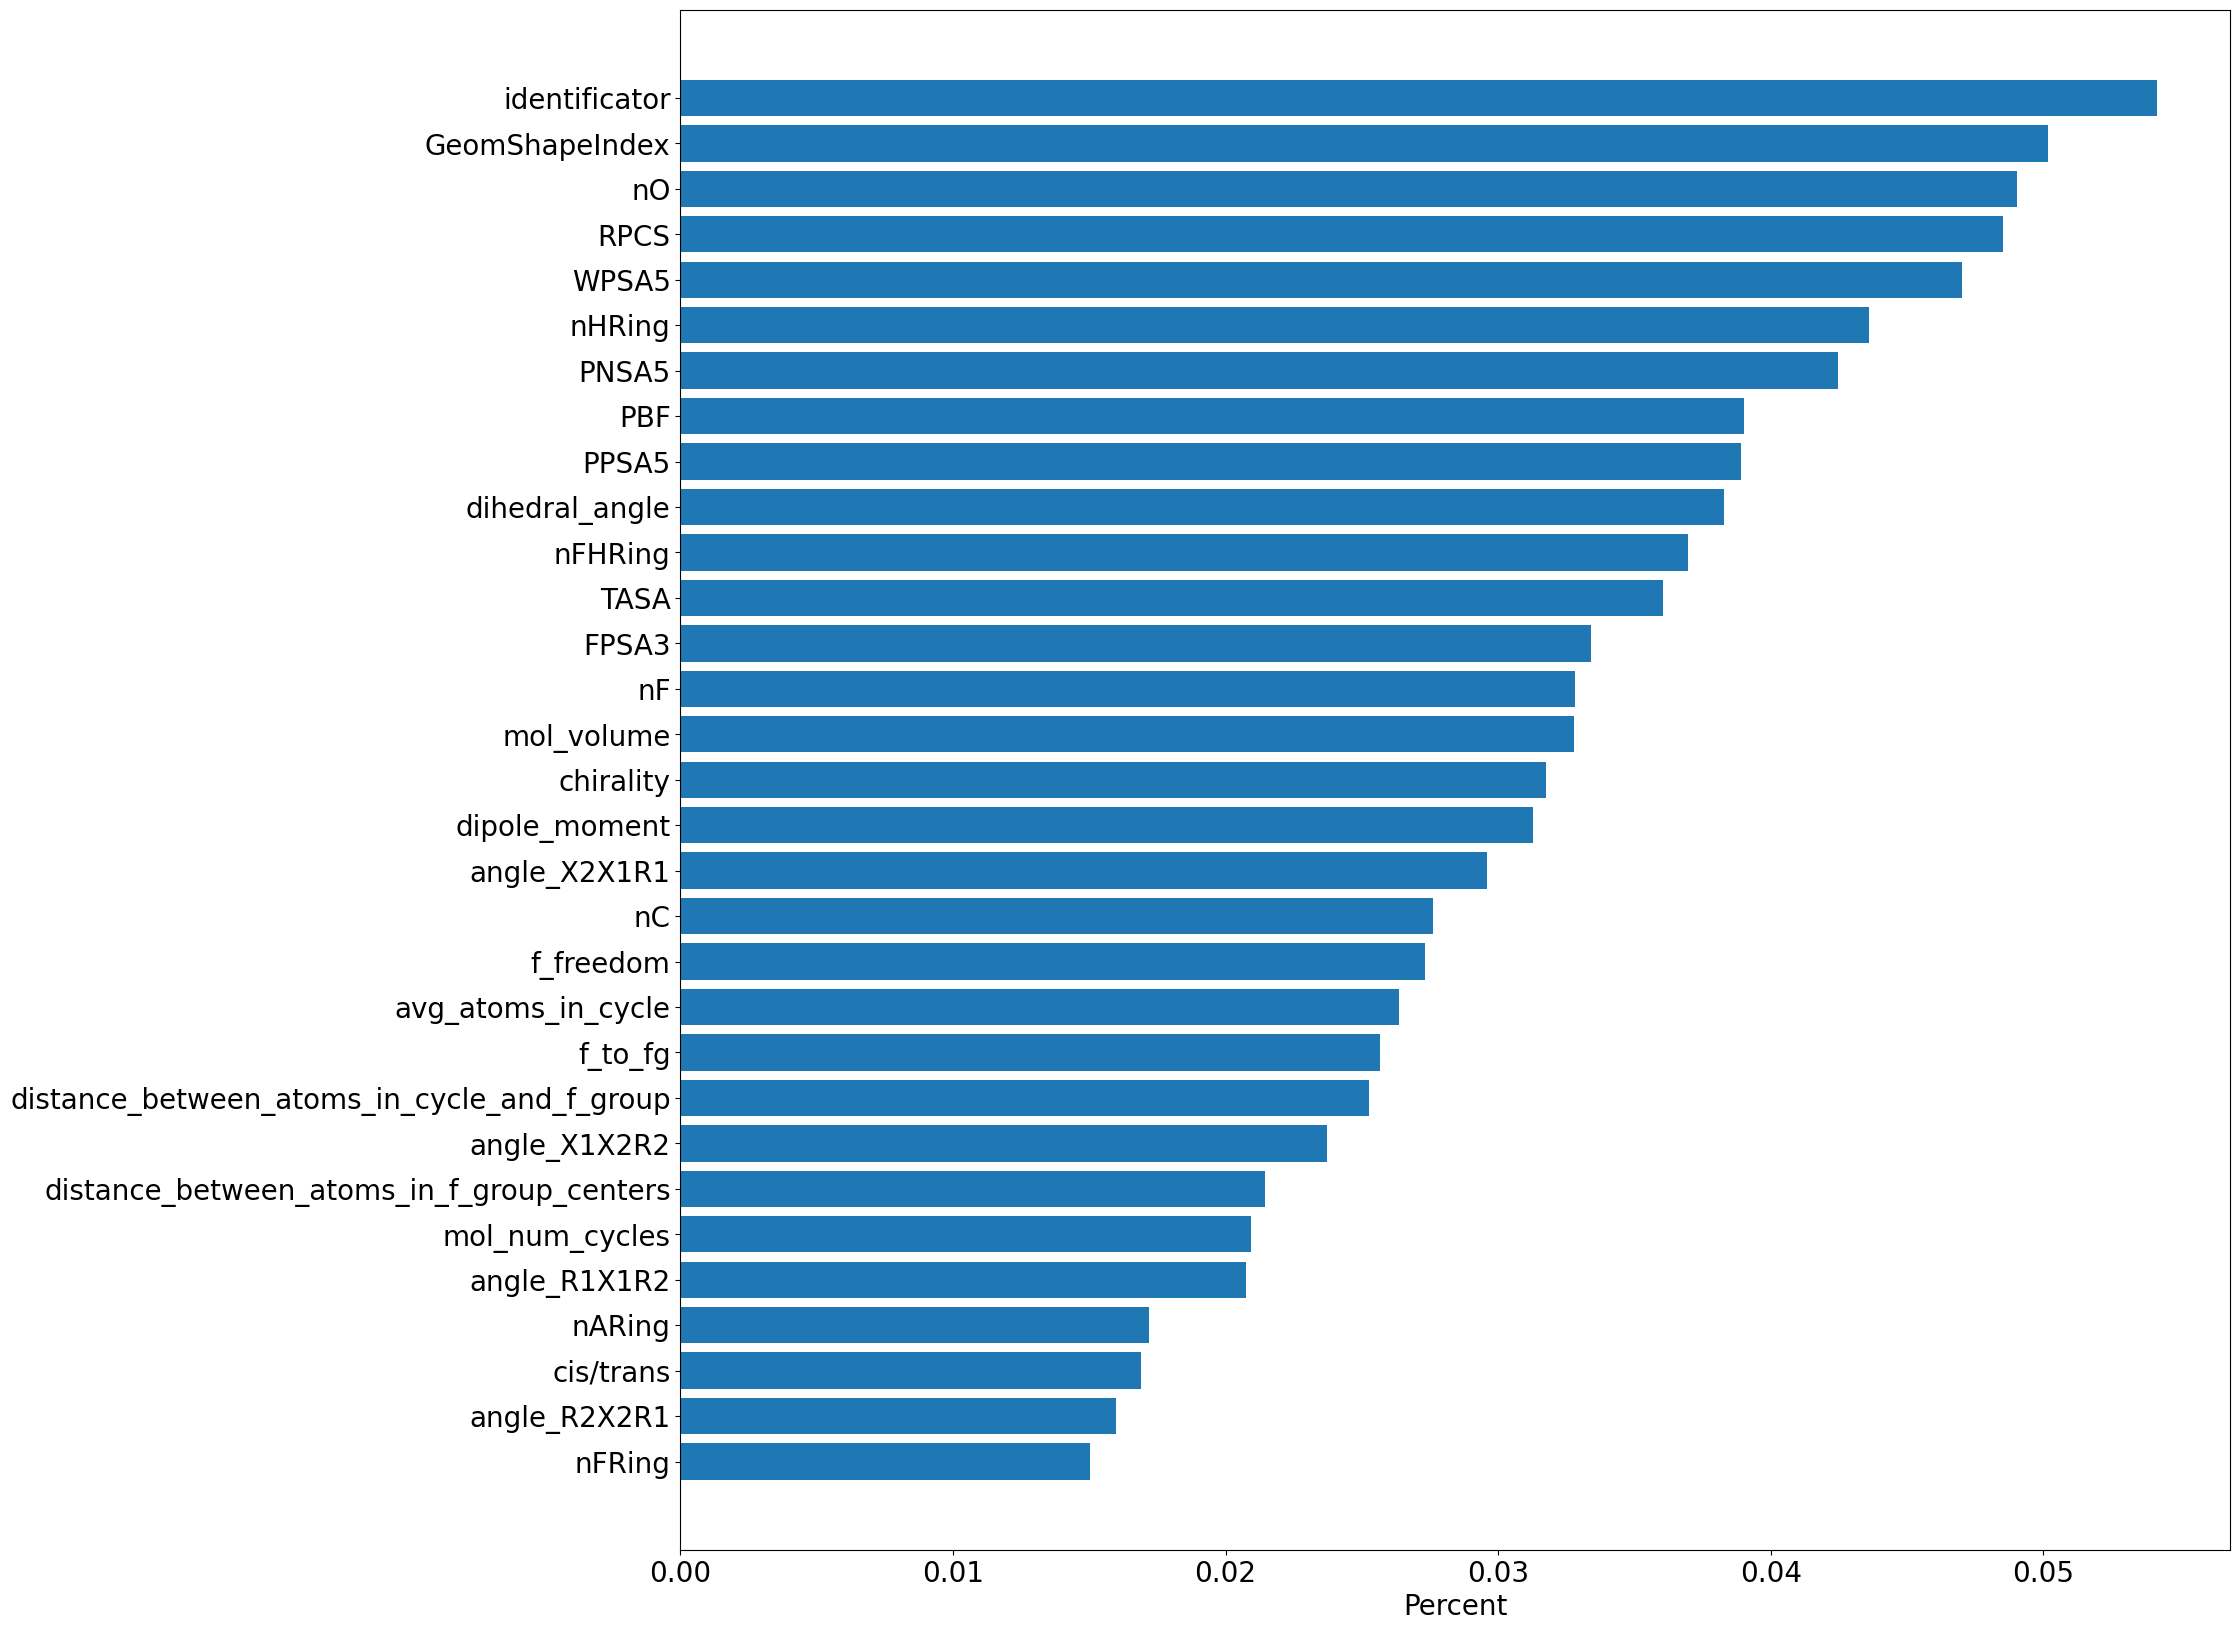

In [36]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

importance = best_model.varimp(test)

if importance is not None:
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.barh(importance['variable'][:][::-1], importance['percentage'][:][::-1])
    ax.set_xlabel('Percent')


In [37]:
import os

MODEL_SAVE_PATH = r'C:\work\DrugDiscovery\main_git\XAI_Chem\ml_part\h2o_model\models\08.02.24_feature_2.2\logP_fixed_MW'

best_model = aml.get_best_model()

model_path = h2o.save_model(model=best_model, path=os.path.join(MODEL_SAVE_PATH, 'only_molecules_with_dihedral_angle(with_angle_feature)_without_outliers'), force=True)
model_path

'C:\\work\\DrugDiscovery\\main_git\\XAI_Chem\\ml_part\\h2o_model\\models\\08.02.24_feature_2.2\\logP_fixed_MW\\only_molecules_with_dihedral_angle(with_angle_feature)_without_outliers\\DeepLearning_grid_1_AutoML_2_20240309_00242_model_107'

---------------

--------------

--------

------------

------------

In [38]:
import os
import sys
sys.path.insert(0, os.path.dirname('C:\work\DrugDiscovery\main_git\XAI_Chem\ml_part'))

import pandas as pd

from ml_part.random_forest.data_prep.preparation import DataPreparation
from ml_part.random_forest.train import RFTrain

CSV_PATH = r'C:\work\DrugDiscovery\git_for_public\fluoricLogPpKa\data\logP_updated_data_08.03_transormed.csv'
smiles_filepath = r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\updated_features\smiles_to_index.pkl'

dataPreparation = DataPreparation(CSV_PATH)

outliers_features_to_skip = ['dipole_moment']
X, y = dataPreparation.prepare_data_for_RF(is_pKa=False,
                                           use_mandatory_features=True,
                                           is_remove_outliers=True,
                                           is_remove_nan=True,
                                           outliers_features_to_skip=outliers_features_to_skip)

correlated_features = ['f_atom_fraction', 'naHRing', 'nFaRing', 'nFaHRing', 'tpsa+f']
ring_features_to_remain = ['nFRing', 'nHRing', 'nARing', 'nFHRing']
features_to_drop = []
for feature_name in X.columns:
    if feature_name in correlated_features:
        features_to_drop.append(feature_name)
    elif "ring" in feature_name.lower() and feature_name not in ring_features_to_remain:
        features_to_drop.append(feature_name)
    elif len(X[feature_name].unique()) == 1:
        print(f"feature without unique values: {feature_name}")
        features_to_drop.append(feature_name)
    elif "angle" in feature_name or "distance" in feature_name:
        features_to_drop.append(feature_name)

X = X.drop(features_to_drop, axis=1)

rf_train = RFTrain(X=X, 
                   y=y,
                   smiles_filepath=smiles_filepath,
                   is_pKa=False,
                   k_folds=2)

y_train = rf_train.y_train
X_train = rf_train.X_train

y_test = rf_train.y_test
X_test = rf_train.X_test

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

print(len(train_df), len(test_df))

train = h2o.H2OFrame(train_df)
test = h2o.H2OFrame(test_df)

True
183
['naRing', 'identificator', 'angle_R2X2R1', 'nO', 'WPSA5', 'avg_atoms_in_cycle', 'nHRing', 'distance_between_atoms_in_f_group_centers', 'RPCS', 'f_freedom', 'TASA', 'nFAHRing', 'f_to_fg', 'nARing', 'FPSA3', 'nF', 'PBF', 'GeomShapeIndex', 'angle_R1X1R2', 'PNSA5', 'cis/trans', 'tpsa+f', 'nC', 'angle_X1X2R2', 'PPSA5', 'angle_X2X1R1', 'distance_between_atoms_in_cycle_and_f_group', 'mol_volume', 'nAHRing', 'nFARing', 'nFRing', 'dihedral_angle', 'dipole_moment', 'chirality', 'nFHRing', 'mol_num_cycles', 'pKa', 'logP']
distance_between_atoms_in_f_group_centers outliers indexes: [ 35 167]
mol_volume outliers indexes: [127]
logP outliers indexes: [82, 83]
Remains rows:106, amount of features: 38
90 16
Parse progress: |

████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [39]:
x = train.columns
y = "logP"
x.remove(y)

aml = H2OAutoML(seed=1, max_runtime_secs_per_model=300)
aml.train(x=x, y=y, training_frame=train, fold_column="fold_id")

lb = aml.leaderboard
print(lb.head(rows=lb.nrows))

AutoML progress: |
01:10:13.554: Fold column fold_id will be used for cross-validation. nfolds parameter will be ignored.
01:10:13.555: AutoML: XGBoost is not available; skipping it.
01:10:13.620: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 90.0.



███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                    rmse        mse       mae      rmsle    mean_residual_deviance
DeepLearning_grid_1_AutoML_3_20240309_11013_model_433   0.241914  0.0585224  0.186381  0.0867827                 0.0585224
DeepLearning_grid_2_AutoML_3_20240309_11013_model_73    0.242524  0.058818   0.176687  0.0878992                 0.058818
StackedEnsemble_BestOfFamily_6_AutoML_3_20240309_11013  0.252759  0.0638871  0.184525  0.0927597                 0.0638871
DeepLearning_grid_2_AutoML_3_20240309_11013_model_34    0.254124  0.064579   0.188371  0.0932192                 0.064579
DeepLearning_grid_1_AutoML_3_20240309_11013_model_17    0.256098  0.0655862  0.19132   0.0935379                 0.0655862
GLM_1_AutoML_3_20240309_11013                           0.256128  0.0656015  0.189566  0.0922606                 0.0656015
DeepLearning_grid_1_AutoML_3_20240309_11013_model_78    0.256997

TRAIN

In [40]:
best_model = aml.get_best_model()
preds = best_model.predict(train)
true = train.as_data_frame()['logP']
predicted_values = preds.as_data_frame()['predict']

calculate_metrics(true, predicted_values)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'mse': 0.011, 'mae': 0.082, 'r^2': 0.963}

OOS

In [41]:
best_model = aml.get_best_model()
preds = best_model.predict(test)
true = test.as_data_frame()['logP']
predicted_values = preds.as_data_frame()['predict']

calculate_metrics(true, predicted_values)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'mse': 0.108, 'mae': 0.253, 'r^2': 0.514}

BEST_MODEL(for cross-val metrics)

In [42]:
best_model

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_3_20240309_11013_model_433


Status of Neuron Layers: predicting logP, regression, gaussian distribution, Quadratic loss, 1 301 weights/biases, 21,4 KB, 900 900 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate             rate_rms               momentum    mean_weight            weight_rms           mean_bias            bias_rms
--  -------  -------  ----------------  ---------  ----  ----  --------------------  ---------------------  ----------  ---------------------  -------------------  -------------------  -----------------------
    1        24       Input             10.0
    2        50       RectifierDropout  30.0       0.0   0.0   0.05711542381526669   0.05704827606678009    0.0         0.005012273549194409   0.3969348669052124   -0.907828816645725   0.9526810646057129
    3        1        Linear                       0.0   0.0   0.003932295013219118  0.0020071575418114662  0.0         -0.007180310413241386  0.20066863298416138  0.26810843668302403  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.011497950521153892
RMSE: 0.10722849677746067
MAE: 0.08248809751942694
RMSLE: 0.04480470425372556
Mean Residual Deviance: 0.011497950521153892

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 0.05852235418770565
RMSE: 0.24191393963082336
MAE: 0.1863806003444922
RMSLE: 0.08678270900417061
Mean Residual Deviance: 0.05852235418770565

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid
----------------------  ---------  ----------  ------------  ------------
mae                     0.186145   0.00749896  0.191447      0.180842
mean_residual_deviance  0.0582592  0.00837204  0.0641792     0.0523393
mse                     0.0582592  0.00837204  0.0641792     0.0523393
r2                      0.812465   0.0189015   0.799099      0.82583
residual_deviance       0.0582592  0.00837204  0.0641792     0.0523393
rmse                    0.241057   0.0173653   0.253336      0.228778
rmsle                   0.0859494  0.0124037   0.0947202     0.0771787

Scoring History: 
    timestamp            duration    training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2024-03-09 02:02:33  0.000 sec                     0         0             0          nan              nan                  nan             nan
    2024-03-09 02:02:33  2.769 sec   180000 obs/sec    10        1             900        0.208266         0.0433747            0.16369         0.86033
    2024-03-09 02:02:35  5.072 sec   390337 obs/sec    10010     1001          900900     0.107228         0.011498             0.0824881       0.962976

Variable Importances: 
variable        relative_importance    scaled_importance    percentage
--------------  ---------------------  -------------------  --------------------
PPSA5           1.0                    1.0                  0.06347288058860959
WPSA5           0.9818286895751953     0.9818286895751953   0.0623194951718774
identificator   0.9647320508956909     0.9647320508956909   0.06123432226650661
PBF             0.8970553278923035     0.8970553278923035   0.05693868570868419
GeomShapeIndex  0.8767454028129578     0.8767454028129578   0.05564955625935927
dipole_moment   0.8344924449920654     0.8344924449920654   0.05296763931307822
cis/trans       0.7829746007919312     0.7829746007919312   0.0496976533399805
mol_volume      0.7715795040130615     0.7715795040130615   0.048974373722839665
PNSA5           0.7610145807266235     0.7610145807266235   0.04830378760865176
TASA            0.7380357384681702 

PERMUTATION IMPORTANCE

c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


C:\Users\38066\AppData\Local\Temp\ipykernel_1040\1575081460.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.barh(sum_rows.keys()[sorted_idx][::-1][:][::-1], sum_rows[sorted_idx][::-1][:][::-1])


Text(0.5, 0, 'H2O Feature Importance')

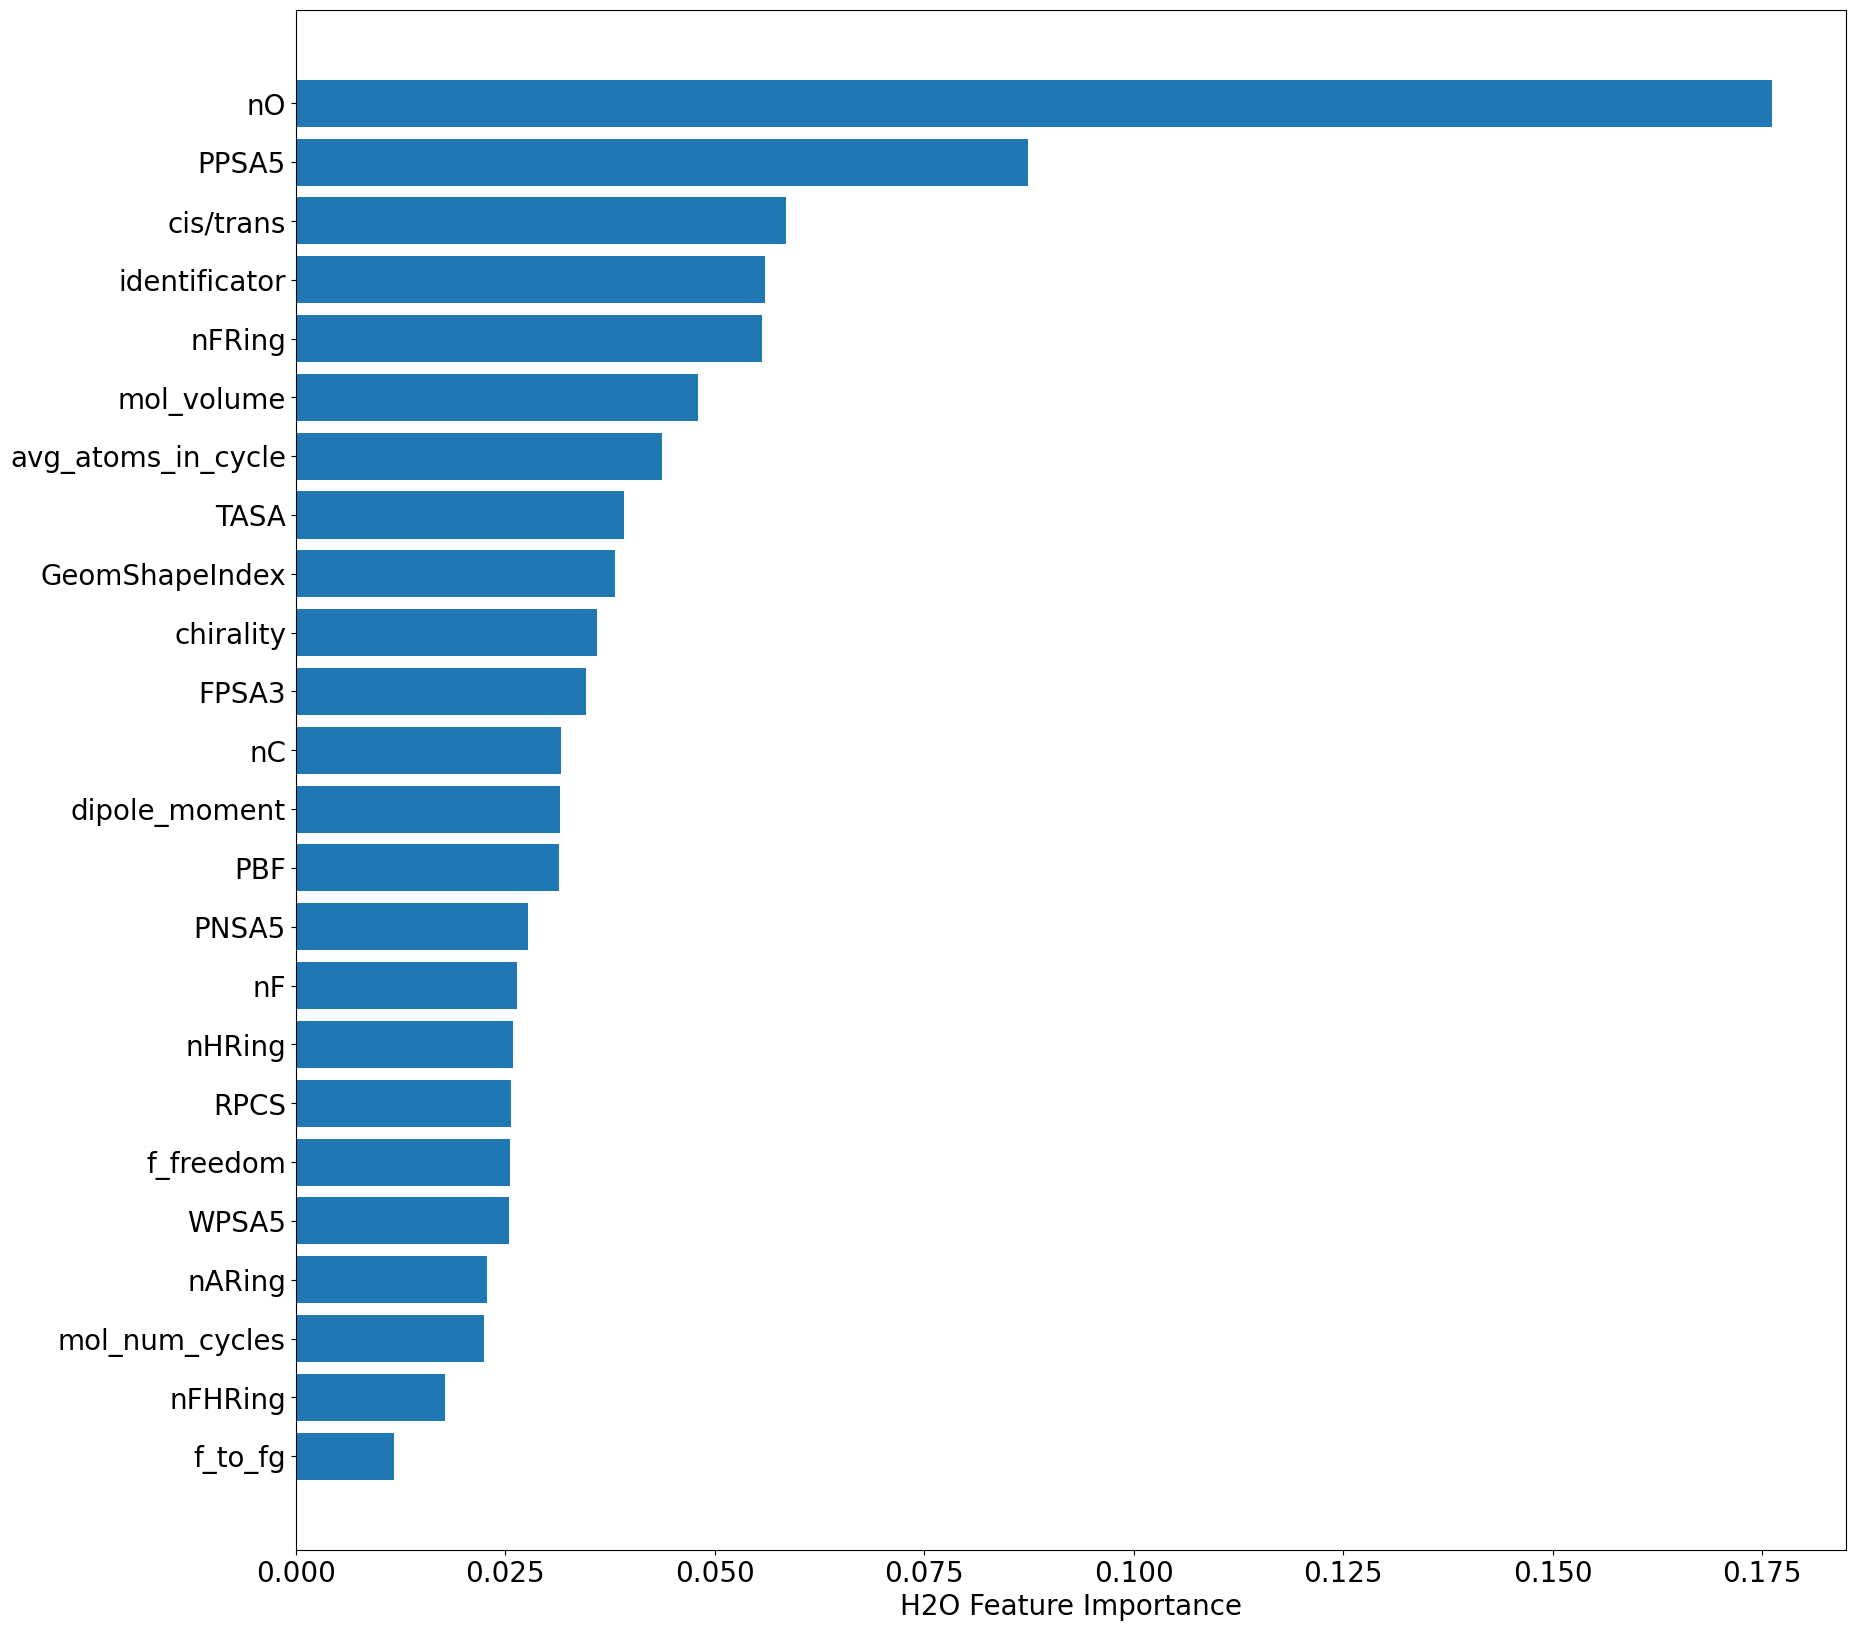

In [43]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

permutation_varimp = best_model.permutation_importance(test, use_pandas=True, n_repeats=1000)

sum_rows = permutation_varimp.sum(axis=1)
sum_rows = sum_rows / sum(sum_rows)

sorted_idx = sum_rows.argsort()
plt.figure(figsize=(20,20))
plt.barh(sum_rows.keys()[sorted_idx][::-1][:][::-1], sum_rows[sorted_idx][::-1][:][::-1])
plt.xlabel("H2O Feature Importance")

SHAP

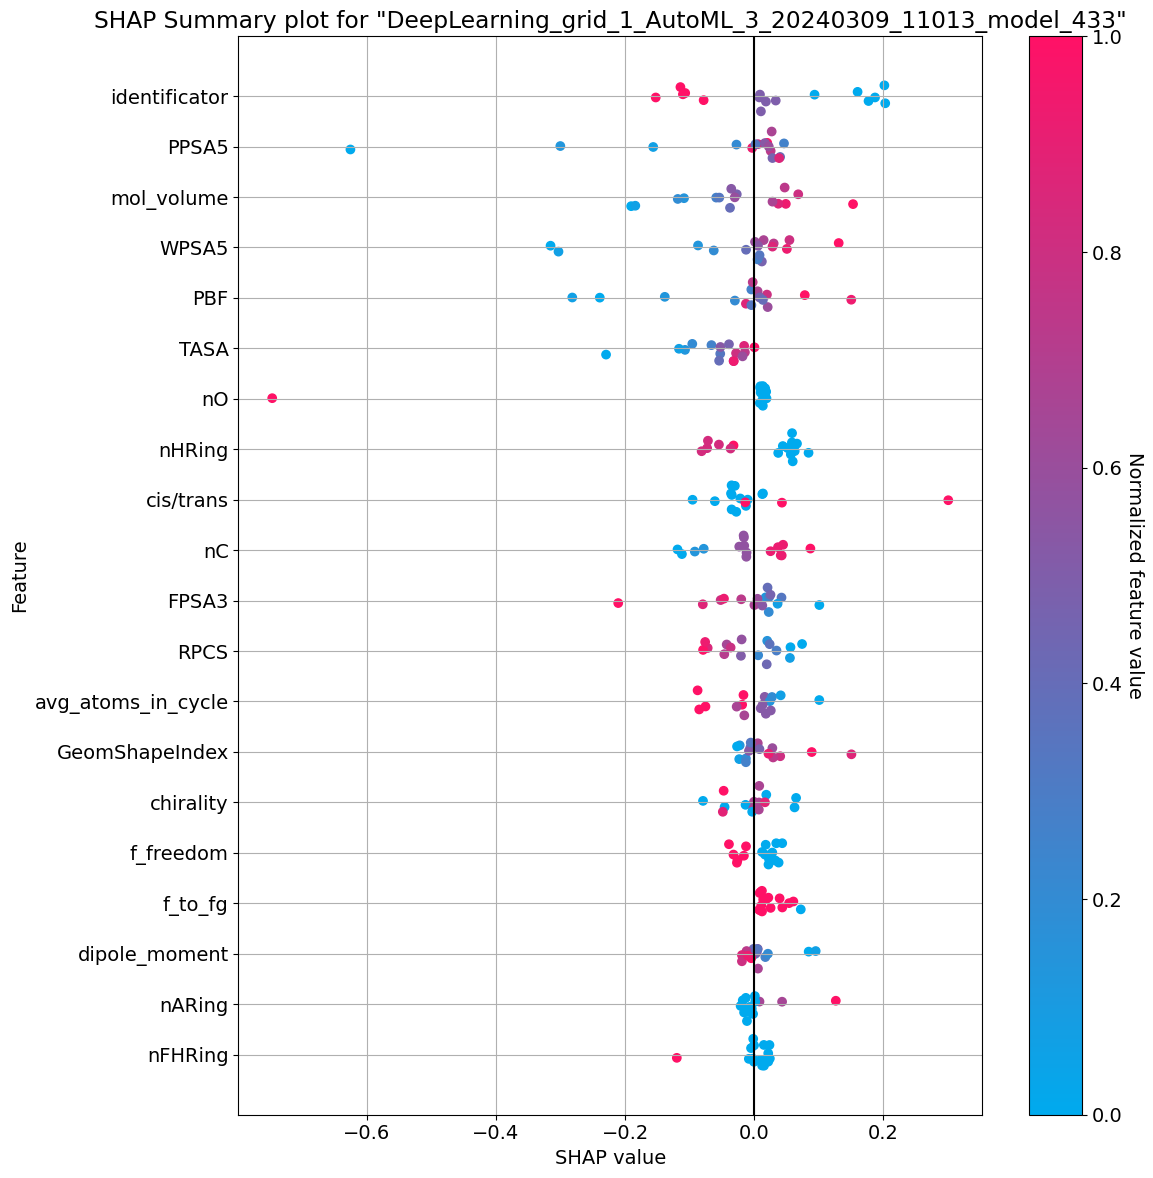

In [44]:
plt.rcParams.update({"font.size": 14})
shap_plot = best_model.shap_summary_plot(test, background_frame=train, samples=1000)

VAR IMPORTANCE

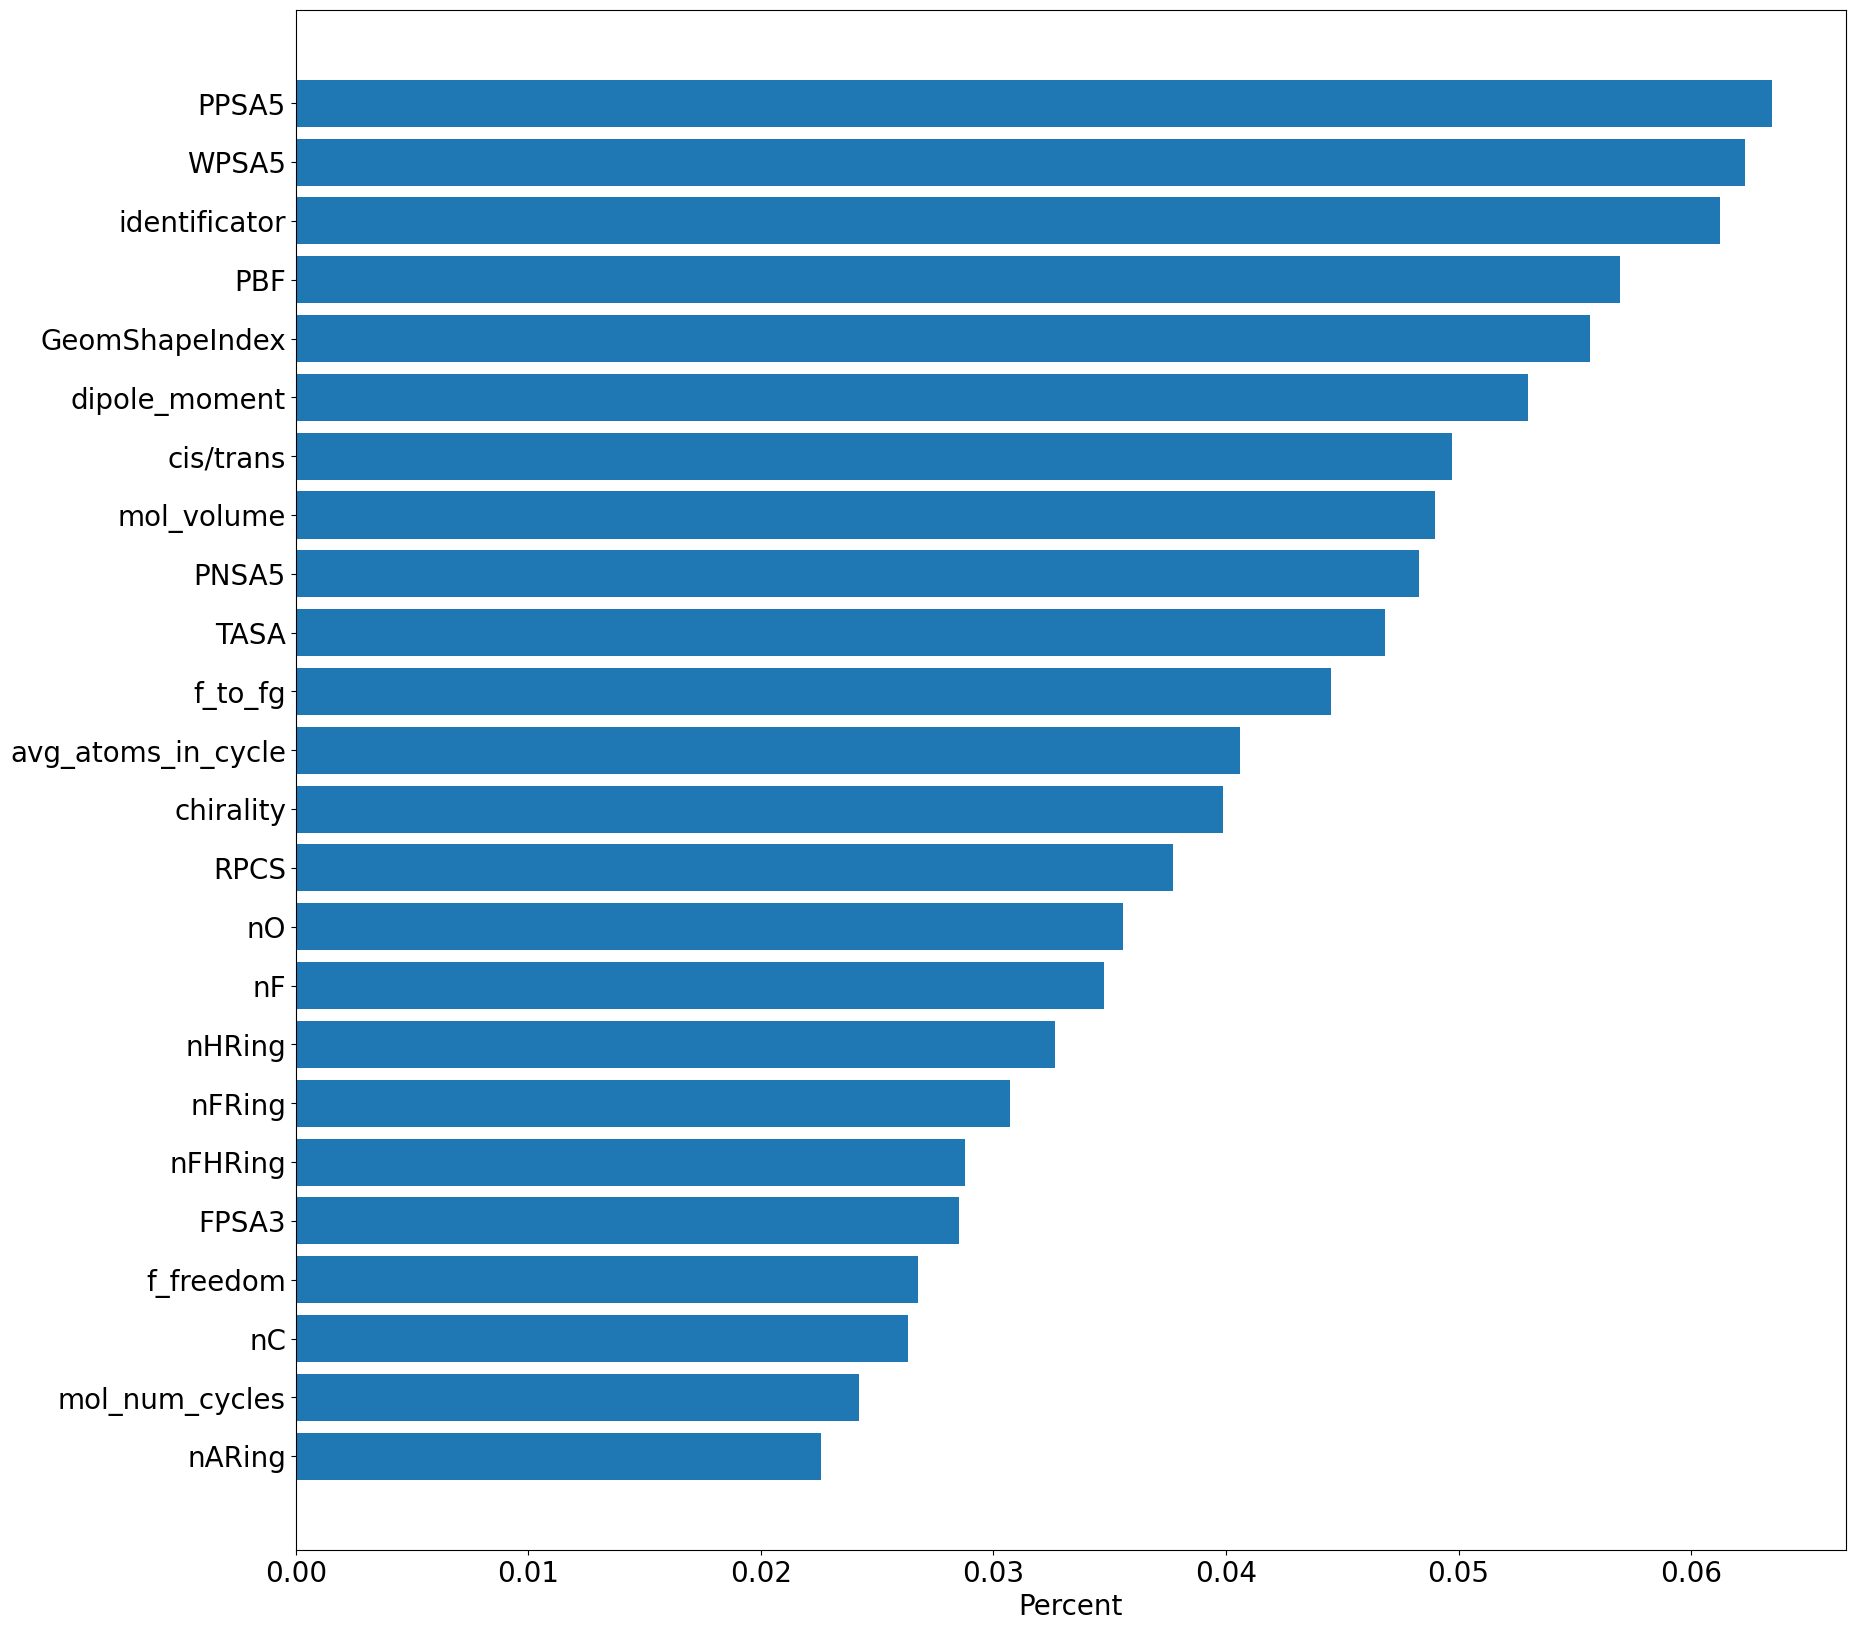

In [45]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

importance = best_model.varimp(test)

if importance is not None:
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.barh(importance['variable'][:][::-1], importance['percentage'][:][::-1])
    ax.set_xlabel('Percent')


In [46]:
import os

MODEL_SAVE_PATH = r'C:\work\DrugDiscovery\main_git\XAI_Chem\ml_part\h2o_model\models\08.02.24_feature_2.2\logP_fixed_MW'

best_model = aml.get_best_model()

model_path = h2o.save_model(model=best_model, path=os.path.join(MODEL_SAVE_PATH, 'only_molecules_with_dihedral_angle(without_angle_feature)_without_outliers'), force=True)
model_path

'C:\\work\\DrugDiscovery\\main_git\\XAI_Chem\\ml_part\\h2o_model\\models\\08.02.24_feature_2.2\\logP_fixed_MW\\only_molecules_with_dihedral_angle(without_angle_feature)_without_outliers\\DeepLearning_grid_1_AutoML_3_20240309_11013_model_433'